In [1]:
import os
import json

path = '.\\content\\DATA'

dirs = os.listdir(path)
label_files = [os.path.join(path, DATA_dir, lablel_file) for DATA_dir in os.listdir(path) for lablel_file in os.listdir(os.path.join(path, DATA_dir)) if lablel_file.endswith('.json')]

for label_file in label_files:
    print(label_file)

.\content\DATA\00048035\00048035.json
.\content\DATA\01142281\01142281.json
.\content\DATA\016047953\106047953.json
.\content\DATA\01990231\01990231.json
.\content\DATA\03158534\03158534.json
.\content\DATA\03877078\03877078.json
.\content\DATA\04886479\04886479.json
.\content\DATA\05609172\05609172.json
.\content\DATA\06280116\06280116.json
.\content\DATA\08485336\08485336.json
.\content\DATA\10874765\10874765.json
.\content\DATA\10929576\10929576.json
.\content\DATA\11830358\11830358.json
.\content\DATA\13549073\13549073.json
.\content\DATA\15144615\151446151.json
.\content\DATA\16060746\16060746.json


In [2]:
# dict_keys(['_via_settings', '_via_img_metadata', '_via_attributes', '_via_data_format_version', '_via_image_id_list'])

data = list()

for label_file in label_files:
    with open(label_file, mode='r', encoding='utf-8') as f:
        load_json = json.load(f)

        for key in load_json['_via_img_metadata']:
            
            this_img_data = load_json['_via_img_metadata'][key]

            temp_dict = dict()
            temp_dict['filename'] = this_img_data['filename']
            temp_dict['filepath'] = os.path.join(path, this_img_data['filename'].split('_')[0], this_img_data['filename'])
            temp_dict['x_label'] = [k['shape_attributes']['all_points_x'] for k in this_img_data['regions']] # [[12], [12], ...]
            temp_dict['y_label'] = [k['shape_attributes']['all_points_y'] for k in this_img_data['regions']] # [[12], [12], ...]
            temp_dict['position'] = [k['region_attributes']['position'] for k in this_img_data['regions']]   # ['L1', 'L2', ...]
            temp_dict['type'] = [k['region_attributes']['type'] for k in this_img_data['regions']]           # ['normal', compre, ...] 

            data.append(temp_dict)

        # print(load_json['_via_image_id_list'])
print(data[0])
print(len(data))
print([k['filename'] for k in data for idx in range(len(k['x_label'])) if len(k['x_label'][idx]) != 12 and k['position'] != 'S'])

{'filename': '00048035_FILE0.bmp', 'filepath': '.\\content\\DATA\\00048035\\00048035_FILE0.bmp', 'x_label': [[399, 430, 458, 470, 535, 567, 591, 554, 523, 513, 477, 442], [481, 511, 529, 537, 586, 652, 684, 657, 614, 597, 571, 533], [550, 577, 606, 620, 651, 710, 781, 755, 719, 693, 678, 584], [629, 649, 682, 683, 748, 818, 863, 847, 823, 805, 754, 699], [692, 708, 733, 726, 768, 850, 922, 913, 884, 868, 843, 802], [745, 753, 765, 753, 795, 827, 970, 958, 942, 935, 829, 786], [762, 773, 776, 750, 811, 933, 980, 977, 975, 967, 919, 835], [767, 775, 765, 747, 796, 833, 966, 980, 987, 979, 930, 847], [762, 763, 761, 742, 768, 897, 971, 978, 982, 980, 948, 830], [750, 766, 751, 739, 792, 872, 964, 982, 987, 987, 935, 838], [743, 744, 736, 719, 784, 857, 942, 951, 967, 976, 904, 816], [677, 672, 657, 642, 696, 774, 838, 868, 896, 945, 845, 764], [603, 574, 545, 490, 536, 629, 669, 697, 768, 824, 761, 683], [418, 400, 375, 351, 406, 512, 559, 591, 632, 651, 577, 476], [309, 274, 255, 233, 31

In [3]:
print('number of labeled data = ' + str(len(data)))

cnt = 0
for d in data:
    cnt += len(d['x_label'])

print('number of labeled vertex = ' + str(cnt))

number of labeled data = 143
number of labeled vertex = 1486


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
import random

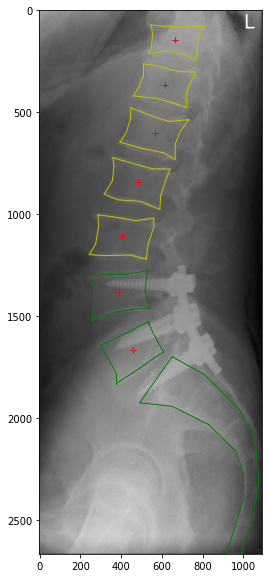

In [5]:
random_id = random.randint(0, len(data)-1)

img = PIL.Image.open(data[random_id]['filepath'])
plt.figure(figsize=(10,10))
implot = plt.imshow(img, cmap='gray')

# use dict as switch statement
get_line_style = {
    'normal': 'y-',
    'compre': 'r-',
    'burst' : 'b-',
    'unsure': 'g-',
}

for idx in range(len(data[random_id]['x_label'])):

    line_style =  get_line_style[data[random_id]['type'][idx]]

    for idx_dot in range(len(data[random_id]['x_label'][idx])):
        x1 = data[random_id]['x_label'][idx][idx_dot]
        y1 = data[random_id]['y_label'][idx][idx_dot]
        x2 = data[random_id]['x_label'][idx][idx_dot + 1 if idx_dot + 1 < len(data[random_id]['x_label'][idx]) else 0]
        y2 = data[random_id]['y_label'][idx][idx_dot + 1 if idx_dot + 1 < len(data[random_id]['x_label'][idx]) else 0]
        # print([x1, y1], [x2, y2])
        plt.plot([x1, x2], [y1, y2], line_style, linewidth = 1)
    
    if data[random_id]['position'][idx] != 'S':
        x_mid = sum(data[random_id]['x_label'][idx])/len(data[random_id]['x_label'][idx])
        y_mid = sum(data[random_id]['y_label'][idx])/len(data[random_id]['y_label'][idx])
        plt.plot(x_mid, y_mid, 'r+')

plt.show()

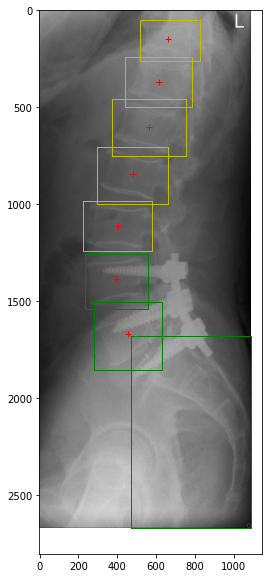

In [6]:
plt.figure(figsize=(10,10))
implot = plt.imshow(img, cmap='gray')

# height, width above/below the max/min point
width = 20
height = 20

boxs = []
mids = []

for idx in range(len(data[random_id]['x_label'])):

    line_style =  get_line_style[data[random_id]['type'][idx]]

    x_max = min(max(data[random_id]['x_label'][idx]) + width, img.size[0])
    x_min = max(min(data[random_id]['x_label'][idx]) - width, 0)
    y_max = min(max(data[random_id]['y_label'][idx]) + height, img.size[1])
    y_min = max(min(data[random_id]['y_label'][idx]) - height, 0)

    plt.plot([x_max, x_max],[y_max, y_min], line_style, linewidth = 1)
    plt.plot([x_min, x_min],[y_max, y_min], line_style, linewidth = 1)
    plt.plot([x_max, x_min],[y_max, y_max], line_style, linewidth = 1)
    plt.plot([x_max, x_min],[y_min, y_min], line_style, linewidth = 1)

    # store the center point (except for S)
    if data[random_id]['position'][idx] != 'S':

        x_mid = sum(data[random_id]['x_label'][idx])/len(data[random_id]['x_label'][idx])
        y_mid = sum(data[random_id]['y_label'][idx])/len(data[random_id]['y_label'][idx])

        plt.plot(x_mid, y_mid, 'r+')

        boxs.append((x_min, y_min, x_max, y_max))
        mids.append((x_mid, y_mid))

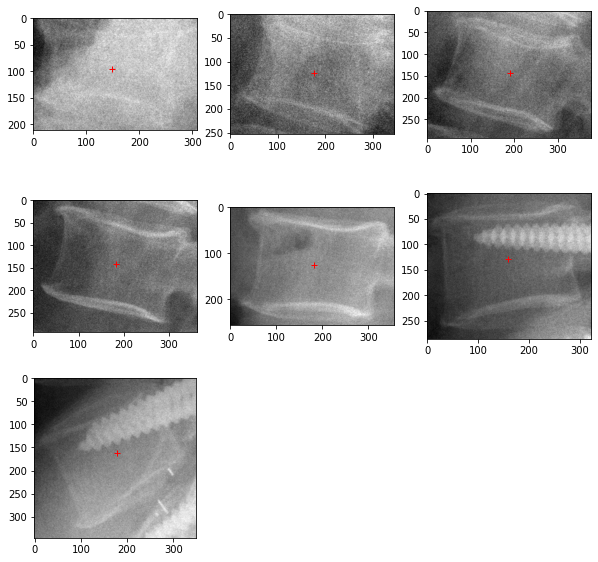

In [7]:
plt.figure(figsize = (10, 10))

nrows = int(len(boxs)/3)+1
ncols = 3

for idx, box in enumerate(boxs):

    # subplot index start from 1
    plt.subplot(nrows, ncols, idx+1)
    plt.imshow(img.crop(box), cmap='gray')
    mid = ( mids[idx][0]-box[0], mids[idx][1]-box[1] )
    # unpack mid
    plt.plot(*mid, 'r+')

In [8]:
import pandas as pd
import numpy as np

import shutil

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [9]:
data_list = []

width_excess = 20
height_excess = 20

print('width excess = ', width_excess)
print('height excess = ', height_excess)

for d in data:
    for (x_labels, y_labels, vpos, vtype) in zip(d['x_label'], d['y_label'], d['position'], d['type']):

        img = PIL.Image.open(d['filepath'])
        img_width, img_height = img.size

        x_mid = sum(x_labels)/len(x_labels)
        y_mid = sum(y_labels)/len(y_labels)

        x_max = min(max(x_labels) + width_excess, img_width)
        x_min = max(min(x_labels) - width_excess, 0)
        y_max = min(max(y_labels) + height_excess, img_height)
        y_min = max(min(y_labels) - height_excess, 0)

        # [S, screw, normal]
        # if vpos == 'S':
        #     vertex_type = 'S'
        # elif vtype == 'unsure':
        #     vertex_type = 'screw'
        # else:
        #     vertex_type = 'normal'

        #[S, vertex]
        vertex_type = 'vertex' if vpos != 'S' else 'S'

        data_list.append(
            [d['filename'], vertex_type, x_min, x_max, y_min, y_max, d['filepath'], img_width, img_height]
            )

df = pd.DataFrame(
    data_list,
    columns=['filename', 'type', 'xmin', 'xmax', 'ymin', 'ymax', 'filepath', 'img_width', 'img_height']
    )

df.head(10)

width excess =  20
height excess =  20


,filename,type,xmin,xmax,ymin,ymax,filepath,img_width,img_height
0,00048035_FILE0.bmp,vertex,379,611,106,342,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001
1,00048035_FILE0.bmp,vertex,461,704,238,512,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001
2,00048035_FILE0.bmp,vertex,530,801,379,645,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001
3,00048035_FILE0.bmp,vertex,609,883,519,774,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001
4,00048035_FILE0.bmp,vertex,672,942,680,932,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001
5,00048035_FILE0.bmp,vertex,725,990,865,1092,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001
6,00048035_FILE0.bmp,vertex,730,1000,1058,1263,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001
7,00048035_FILE0.bmp,vertex,727,1007,1235,1436,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001
8,00048035_FILE0.bmp,vertex,722,1002,1417,1633,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001
9,00048035_FILE0.bmp,vertex,719,1007,1615,1850,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001


In [10]:
def box_width(df):
    return int(df.xmax - df.xmin)
def box_height(df):
    return int(df.ymax - df.ymin)
def x_center(df):
    return int(df.xmin + (df.width/2))
def y_center(df):
    return int(df.ymin + (df.height/2))
def x_center_norm(df):
    return df.x_center/df.img_width
def y_center_norm(df):
    return df.y_center/df.img_height
def w_norm(df):
    return df.width/df.img_width
def h_norm(df):
    return df.height/df.img_height

le = LabelEncoder()
le.fit(df['type'])
print(le.classes_)
labels = le.transform(df['type'])
df['labels'] = labels

df['width'] = df.apply(box_width, axis=1)
df['height'] = df.apply(box_height, axis=1)

df['x_center'] = df.apply(x_center, axis=1)
df['y_center'] = df.apply(y_center, axis=1)

df['x_center_norm'] = df.apply(x_center_norm, axis = 1)
df['width_norm'] = df.apply(w_norm, axis = 1)

df['y_center_norm'] = df.apply(y_center_norm, axis = 1)
df['height_norm'] = df.apply(h_norm, axis = 1)

df.head(30)

['S' 'vertex']


,filename,type,xmin,xmax,ymin,ymax,filepath,img_width,img_height,labels,width,height,x_center,y_center,x_center_norm,width_norm,y_center_norm,height_norm
0,00048035_FILE0.bmp,vertex,379,611,106,342,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001,1,232,236,495,224,0.376140,0.176292,0.074642,0.078640
1,00048035_FILE0.bmp,vertex,461,704,238,512,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001,1,243,274,582,375,0.442249,0.184650,0.124958,0.091303
2,00048035_FILE0.bmp,vertex,530,801,379,645,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001,1,271,266,665,512,0.505319,0.205927,0.170610,0.088637
3,00048035_FILE0.bmp,vertex,609,883,519,774,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001,1,274,255,746,646,0.566869,0.208207,0.215262,0.084972
4,00048035_FILE0.bmp,vertex,672,942,680,932,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001,1,270,252,807,806,0.613222,0.205167,0.268577,0.083972
5,00048035_FILE0.bmp,vertex,725,990,865,1092,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001,1,265,227,857,978,0.651216,0.201368,0.325891,0.075641
6,00048035_FILE0.bmp,vertex,730,1000,1058,1263,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001,1,270,205,865,1160,0.657295,0.205167,0.386538,0.068311
7,00048035_FILE0.bmp,vertex,727,1007,1235,1436,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001,1,280,201,867,1335,0.658815,0.212766,0.444852,0.066978
8,00048035_FILE0.bmp,vertex,722,1002,1417,1633,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001,1,280,216,862,1525,0.655015,0.212766,0.508164,0.071976
9,00048035_FILE0.bmp,vertex,719,1007,1615,1850,.\content\DATA\00048035\00048035_FILE0.bmp,1316,3001,1,288,235,863,1732,0.655775,0.218845,0.577141,0.078307


In [11]:
# split dataset to train valid by image file

X = df['filename'].unique()
X_train, X_valid = train_test_split(X, test_size=0.1, random_state=42, shuffle=True)
print(len(X_train), len(X_valid))
print('No. of labels in train', sum([len(df[df['filename'] == x]) for x in X_train]))
print('No. of labels in test ', sum([len(df[df['filename'] == x]) for x in X_valid]))

128 15
No. of labels in train 1342
No. of labels in test  144


In [12]:
df_train = df[df['filename'].isin(X_train)]
df_valid = df[df['filename'].isin(X_valid)]
print(df_train.shape, df_valid.shape)

os.mkdir('./content/bcc')
os.mkdir('./content/bcc/images/')
os.mkdir('./content/bcc/images/train/')
os.mkdir('./content/bcc/images/valid/')

os.mkdir('./content/bcc/labels/')
os.mkdir('./content/bcc/labels/train/')
os.mkdir('./content/bcc/labels/valid/')

def segregate_data(df, img_path, label_path, train_img_path, train_label_path):
    filenames = []
    for filename in df.filename:
        filenames.append(filename)
    filenames = set(filenames)

    for filename in filenames:
        yolo_list = []

        for idx, row in df[df.filename == filename].iterrows():
            yolo_list.append([row.labels, row.x_center_norm, row.y_center_norm, row.width_norm, row.height_norm])

        yolo_list = np.array(yolo_list)
        txt_filename = os.path.join(train_label_path, filename.split('.')[0]+'.txt')
        np.savetxt(txt_filename, yolo_list, fmt = ["%d", "%f", "%f", "%f", "%f"])

        local_img_path = os.path.join(img_path, filename.split('_')[0])
        shutil.copyfile(os.path.join(local_img_path, row.filename), os.path.join(train_img_path, row.filename))

src_img_path = '.\\content\\DATA'
src_label_path = ''

train_img_path = './content/bcc/images/train'
train_label_path = './content/bcc/labels/train'

valid_img_path = './content/bcc/images/valid'
valid_label_path = './content/bcc/labels/valid'

segregate_data(df_train, src_img_path, src_label_path, train_img_path, train_label_path)
segregate_data(df_valid, src_img_path, src_label_path, valid_img_path, valid_label_path)

print('No. of Training images ', len(os.listdir('./content/bcc/images/train')))
print('No. of Training labels ', len(os.listdir('./content/bcc/labels/train')))

print('No. of valid images ', len(os.listdir('./content/bcc/images/valid')))
print('No. of valid labels ', len(os.listdir('./content/bcc/labels/valid')))

(1342, 18) (144, 18)


FileExistsError: [WinError 183] 當檔案已存在時，無法建立該檔案。: './content/bcc'